Task 1
If you were asked to build a model for predicting arousal and valence, using the provided audio
features as explanatory variables:

1. Which performance metrics would you use to evaluate your model’s predictions?

2. Does the selection of the performance metric depend on the type of the response
variables? Explain your reasoning.

3. Which validation protocol (e.g., holdout set, k-fold cross-validation, etc.) would you
use given that the objective is to build a predictive model able to generalise across
participants (i.e., make accurate predictions for unseen participants)? Justify your
choice.

Task 2 Using the provided audio features, build predictive models for arousal and valence:

1. Develop a predictive model for each response variable (arousal and valence) using
some or all of the provided audio features as explanatory variables

 Task 3 
 In  this  task,  you  will  identify  similar  observations  captured  from  the  first  participant 
(participant ID = 1). Complete the following steps: 

1. Create  groups  of  similar  observations  from  the  first  participant  by  proposing  and 
implementing two suitable algorithms. 

We created a subset of the dataset by selecting only participant 1's data, we subsequently dropped the partipants column as this data is uneccassary. We also removed the median_arousal and median_variance as this section is based on creating groups of similar observations (features) and these last two columns are annotations/scores.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("project_data.csv")

participant_df = df[df["Participant"] == 1]
participant_df = participant_df.drop(columns=["Participant",'median_arousal', 'median_valence'])
print(participant_df)

df.to_csv('out.csv',index=False)


     ComParE13_LLD_25Hz_F0final_sma_amean  \
0                               -1.665550   
1                               -1.547531   
2                               -0.977216   
3                               -0.218558   
4                                0.075725   
..                                    ...   
720                              0.834987   
721                              0.995974   
722                              1.229950   
723                              1.597127   
724                              2.174707   

     ComParE13_LLD_25Hz_voicingFinalUnclipped_sma_amean  \
0                                            -1.018178    
1                                            -0.988172    
2                                            -0.724075    
3                                             0.150993    
4                                             0.221303    
..                                                 ...    
720                                           

For this question I would like to perform Hierarchical clustering using complete linkage and K-mediods with random initialization to further minimize the optimization criterion along with forward step wise assignment.

     ComParE13_LLD_25Hz_F0final_sma_amean  \
0                               -1.665550   
1                               -1.547531   
2                               -0.977216   
3                               -0.218558   
4                                0.075725   
..                                    ...   
720                              0.834987   
721                              0.995974   
722                              1.229950   
723                              1.597127   
724                              2.174707   

     ComParE13_LLD_25Hz_voicingFinalUnclipped_sma_amean  \
0                                            -1.018178    
1                                            -0.988172    
2                                            -0.724075    
3                                             0.150993    
4                                             0.221303    
..                                                 ...    
720                                           

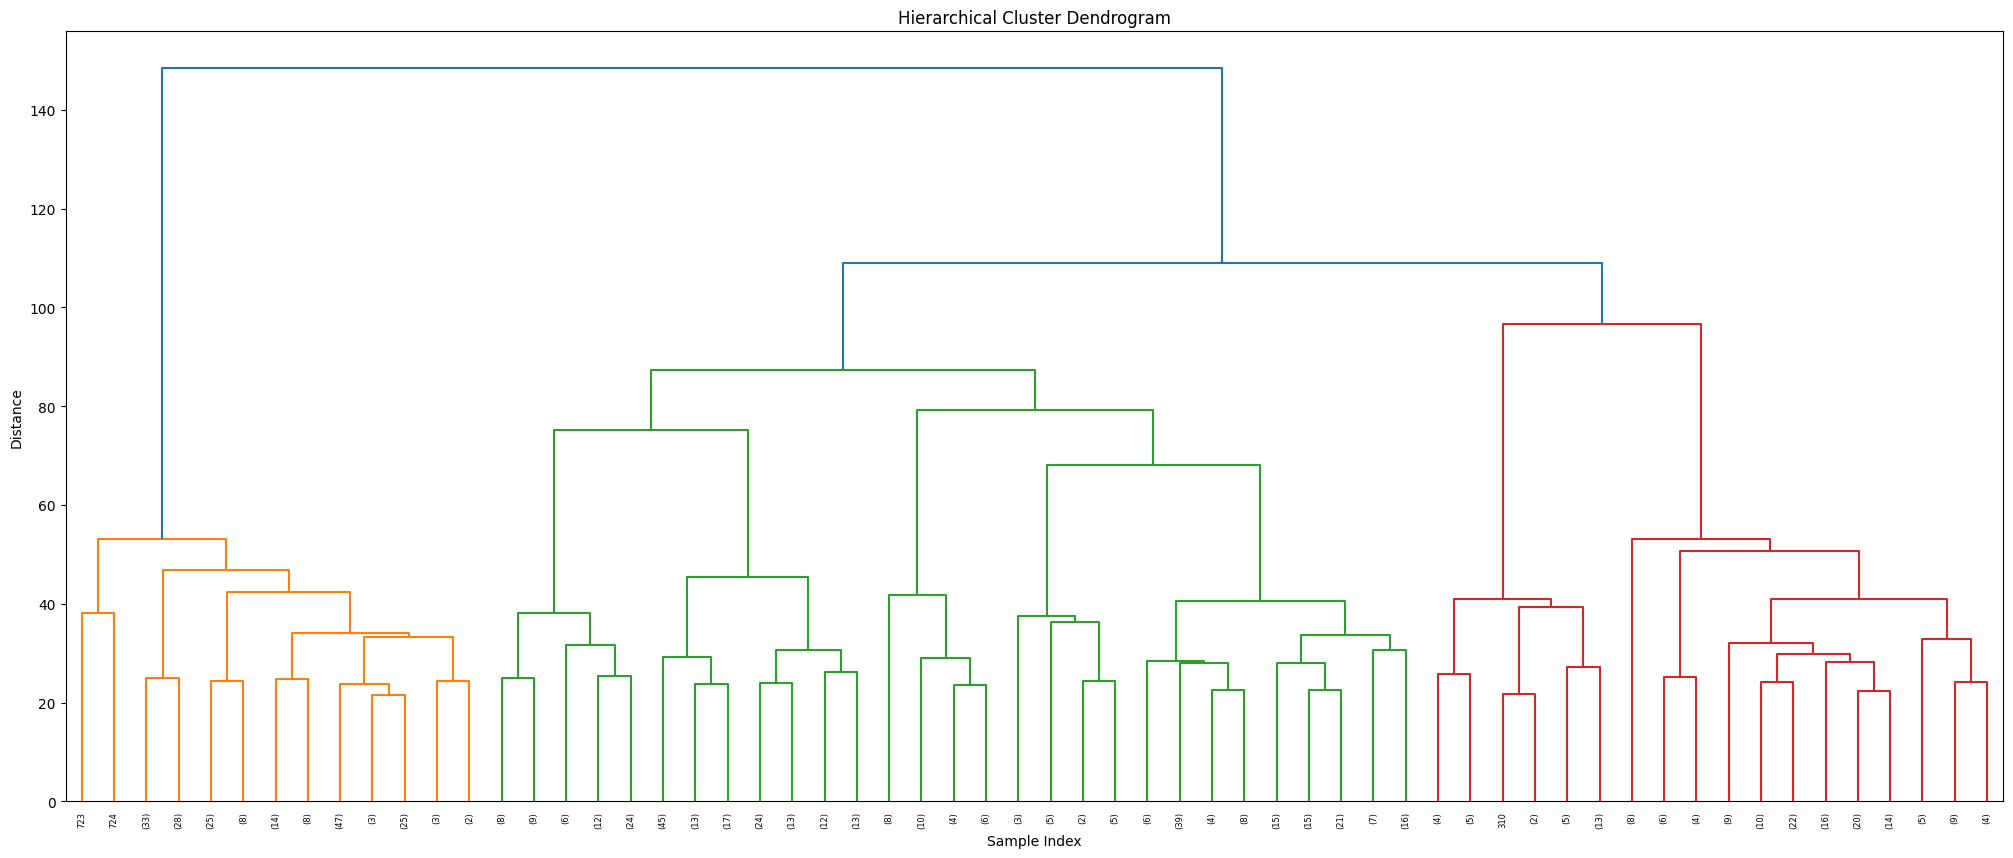

In [12]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.cluster.hierarchy import fcluster

from sklearn.datasets import make_blobs

print(participant_df)
plt.figure(figsize=(25,10))
dn = dendrogram(linkage(participant_df,'ward'),truncate_mode='lastp',p=60)
plt.title('Hierarchical Cluster Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

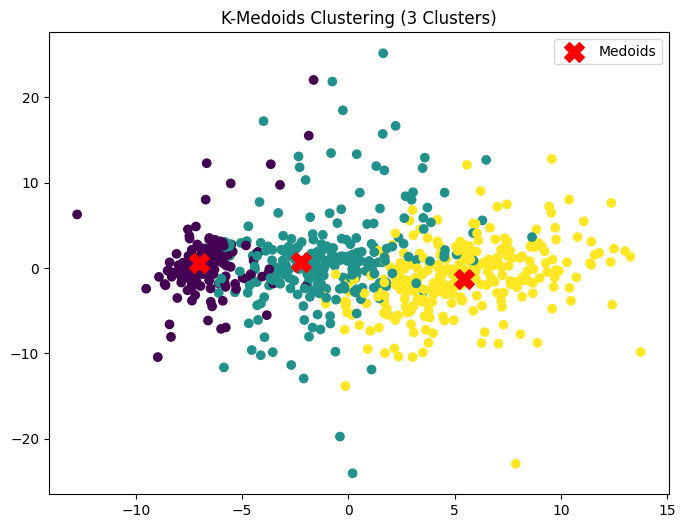

In [8]:

from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

#kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
kmedoids = KMedoids(n_clusters=3, random_state=42)
labels = kmedoids.fit_predict(participant_df)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(participant_df)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(X_pca[kmedoids.medoid_indices_, 0], X_pca[kmedoids.medoid_indices_, 1], c='red', marker='X', s=200, label='Medoids')
plt.title('K-Medoids Clustering (3 Clusters)')
plt.legend()
plt.show()